In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
datafile = '3-Airplane_Crashes_Since_1908.txt'
df = pd.read_table(datafile, sep=',')
df['Crash'] = 1
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Crash
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,0,"During a demonstration flight, a U.S. Army fly...",1
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,5,0,First U.S. dirigible Akron exploded just offsh...,1
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1,1,0,The first fatal airplane accident in Canada oc...,1
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0,The airship flew into a thunderstorm and encou...,1
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0,Hydrogen gas which was being vented was sucked...,1


In [64]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = pd.DatetimeIndex(df.Date).to_period("y")
YearVsDeaths = df.groupby('Year').sum()
YearVsDeaths.head()

,Aboard,Fatalities,Ground,Crash
Year,,,,
1908,2,1,0,1
1912,5,5,0,1
1913,51,45,0,3
1915,60,40,0,2
1916,109,108,0,5


([<matplotlib.axis.XTick at 0x11254a7d0>,
 <a list of 11 Text xticklabel objects>)

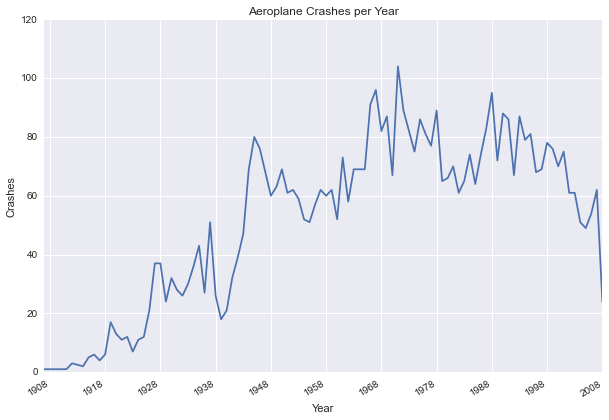

In [73]:
plt.figure(figsize=(10, 7))
ax = YearVsDeaths['Crash'].plot(x_compat=True)
ax.set(xlabel='Year', ylabel='Crashes', title='Aeroplane Crashes per Year')
plt.xticks(pd.date_range("1908", "2009", freq="10A"))

([<matplotlib.axis.XTick at 0x10fb91190>,
 <a list of 11 Text xticklabel objects>)

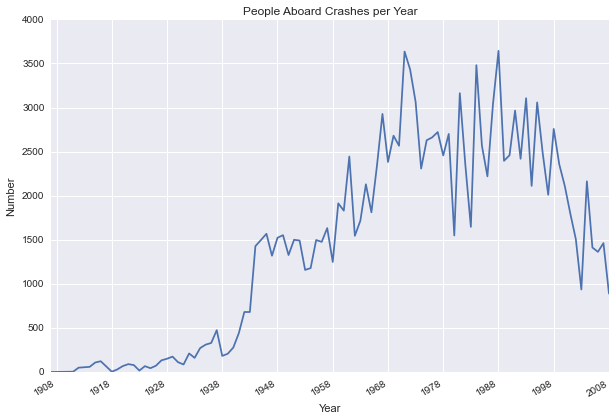

In [75]:
plt.figure(figsize=(10, 7))
ax = YearVsDeaths['Aboard'].plot(x_compat=True)
ax.set(xlabel='Year', ylabel='Number', title='People Aboard Crashes per Year')
plt.xticks(pd.date_range("1908", "2009", freq="10A"))